In [ ]:
!unzip /content/images-20260219T124549Z-1-001.zip




Archive:  /content/images-20260219T124549Z-1-001.zip
  inflating: images/image_211.jpg    
  inflating: images/image_683.jpg    
  inflating: images/image_921.jpg    
  inflating: images/image_391.jpg    
  inflating: images/image_754.jpg    
  inflating: images/image_193.jpg    
  inflating: images/image_679.jpg    
  inflating: images/image_831.jpg    
  inflating: images/image_897.jpg    
  inflating: images/image_227.jpg    
  inflating: images/image_633.jpg    
  inflating: images/image_898.jpg    
  inflating: images/image_264.jpg    
  inflating: images/image_501.jpg    
  inflating: images/image_861.jpg    
  inflating: images/image_114.jpg    
  inflating: images/image_821.jpg    
  inflating: images/image_816.jpg    
  inflating: images/image_275.jpg    
  inflating: images/image_937.jpg    
  inflating: images/image_817.jpg    
  inflating: images/image_729.jpg    
  inflating: images/image_428.jpg    
  inflating: images/image_803.jpg    
  inflating: images/image_685.jpg  

In [ ]:
!ls


images	images-20260219T124549Z-1-001.zip  labels.txt  sample_data


In [ ]:
!ls images | head


image_0.jpg
image_100.jpg
image_101.jpg
image_102.jpg
image_103.jpg
image_104.jpg
image_105.jpg
image_106.jpg
image_107.jpg
image_108.jpg


In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
with open("labels.txt", "r") as f:
    lines = f.readlines()

print("Total lines:", len(lines))
print(lines[:5])   # show first 5 lines


Total lines: 975
['image_0.jpg 1 NA 0 1\n', 'image_1.jpg NA 0 0 0\n', 'image_2.jpg 1 1 0 0\n', 'image_3.jpg 1 1 0 0\n', 'image_4.jpg 1 1 0 0\n']


In [ ]:
image_paths = []
labels = []

for line in lines:
    parts = line.strip().split()

    img_name = parts[0]
    attrs = []

    for x in parts[1:]:
        if x == "NA":
            attrs.append(-1)
        else:
            attrs.append(int(x))

    image_paths.append("images/" + img_name)
    labels.append(attrs)

print("Example image path:", image_paths[0])
print("Example label:", labels[0])


Example image path: images/image_0.jpg
Example label: [1, -1, 0, 1]


Image size: (600, 600)


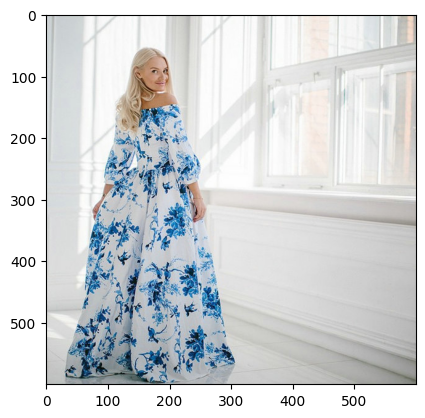

In [ ]:
img = Image.open(image_paths[0])
print("Image size:", img.size)

plt.imshow(img)
plt.show()


In [ ]:
img = img.resize((224, 224))
img_array = np.array(img) / 255.0

print("Shape:", img_array.shape)


Shape: (224, 224, 3)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False   # freeze pretrained layers

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(4, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)


In [ ]:
X = []
y_fixed = []

for img_name, label in zip([p.split("/")[-1] for p in image_paths], labels):

    full_path = "/content/images/" + img_name

    if not os.path.exists(full_path):
        continue

    img = Image.open(full_path).convert("RGB")
    img = img.resize((224,224))
    img = np.array(img) / 255.0

    X.append(img)
    y_fixed.append(label)

X = np.array(X)
y = np.array(y_fixed)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (972, 224, 224, 3)
y shape: (972, 4)


In [ ]:
history = model.fit(
    X,
    y,
    epochs=5,
    batch_size=16
)


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - loss: 0.5532
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 595ms/step - loss: 0.3692
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 552ms/step - loss: 0.2423
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 589ms/step - loss: 0.2521
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 590ms/step - loss: 0.2287


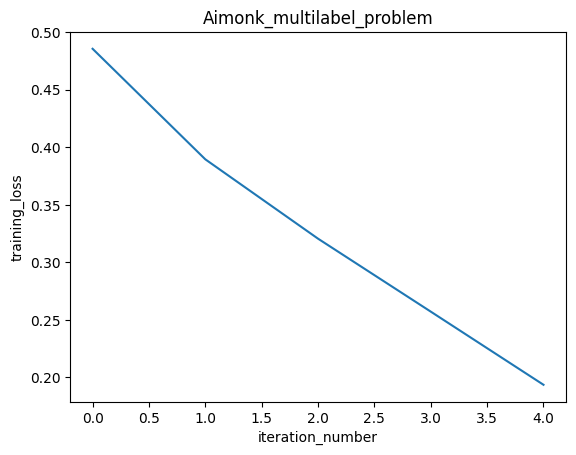

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("iteration_number")
plt.ylabel("training_loss")
plt.title("Aimonk_multilabel_problem")
plt.show()


In [ ]:
model.save("model.h5")


In [ ]:
def masked_loss(y_true, y_pred):
    mask = tf.cast(tf.not_equal(y_true, -1), tf.float32)
    loss = tf.keras.backend.binary_crossentropy(y_true, y_pred)
    loss = loss * mask
    return tf.reduce_sum(loss) / tf.reduce_sum(mask)


In [ ]:
model.compile(
    optimizer="adam",
    loss=masked_loss
)


In [ ]:
history = model.fit(
    X,
    y,
    epochs=5,
    batch_size=16
)


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 39s 543ms/step - loss: 0.6484
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 554ms/step - loss: 0.5884
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 600ms/step - loss: 0.4110
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 35s 569ms/step - loss: 0.3726
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 43s 603ms/step - loss: 0.3694


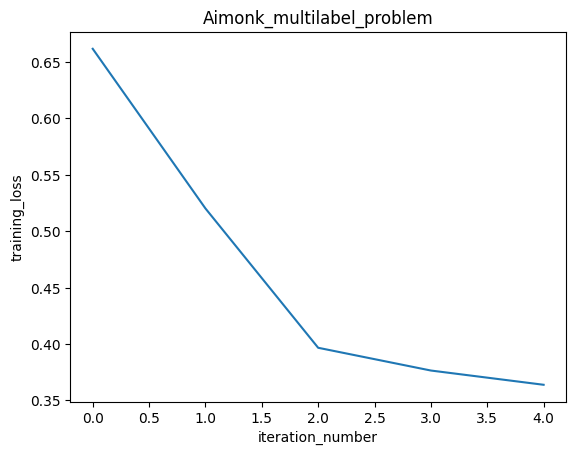

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel("iteration_number")
plt.ylabel("training_loss")
plt.title("Aimonk_multilabel_problem")
plt.show()


In [ ]:
model.save("final_model.h5")
